In [1]:
%load_ext autoreload
%autoreload 2

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from adsr import Envelope
from waves import Triangle, SawTooth, Square, Sine
from synth import Sequential, Synth

In [66]:
t1 = Triangle(frequency="C0", duration=6)
t2 = Sine(frequency=2, duration=1)
t3 = Square(frequency=3, duration=1)
t4 = SawTooth(frequency=5, duration=1)

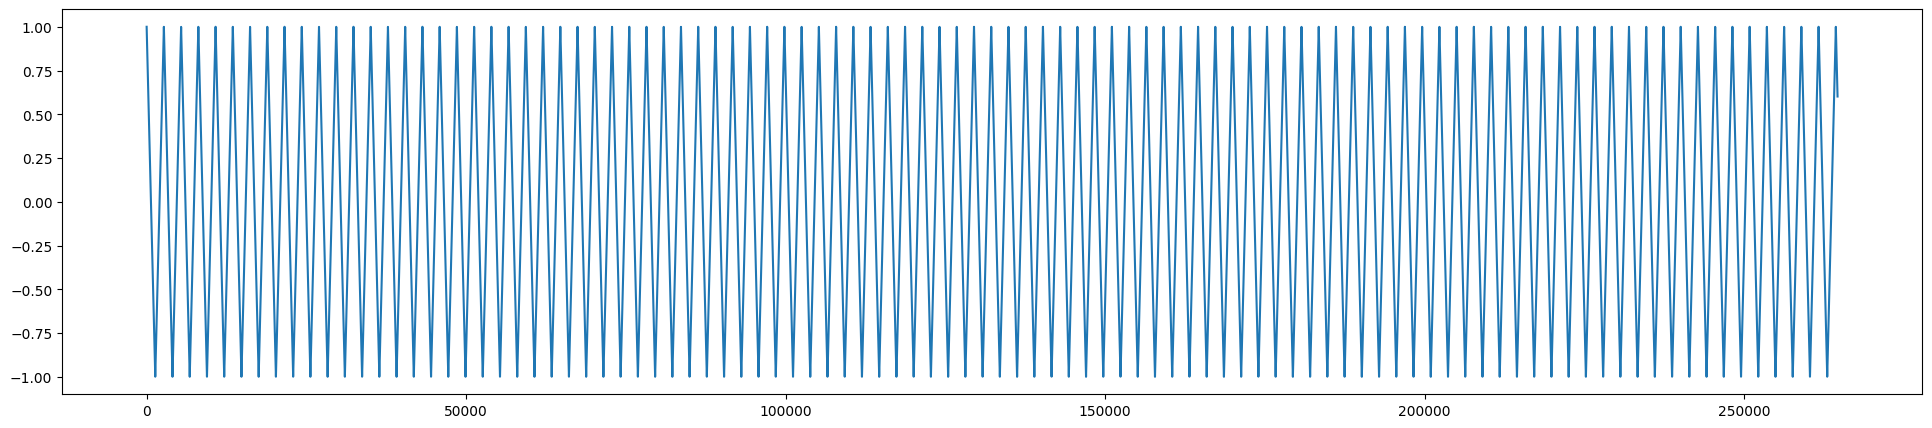

In [67]:
plt.figure(figsize=(24, 5))
plt.plot(t1)

In [68]:
envelope = Envelope(
    attackTime=1,
    decayTime=1,
    sustainLevel=.5,
    releaseTime=1,
    duration=2
)

In [69]:
a_t1 = envelope._apply_attack(t1)
d_t1 = envelope._apply_decay(t1)
s_t1 = envelope._apply_sustain(t1)
# r_t1 = envelope._apply_release(t1)

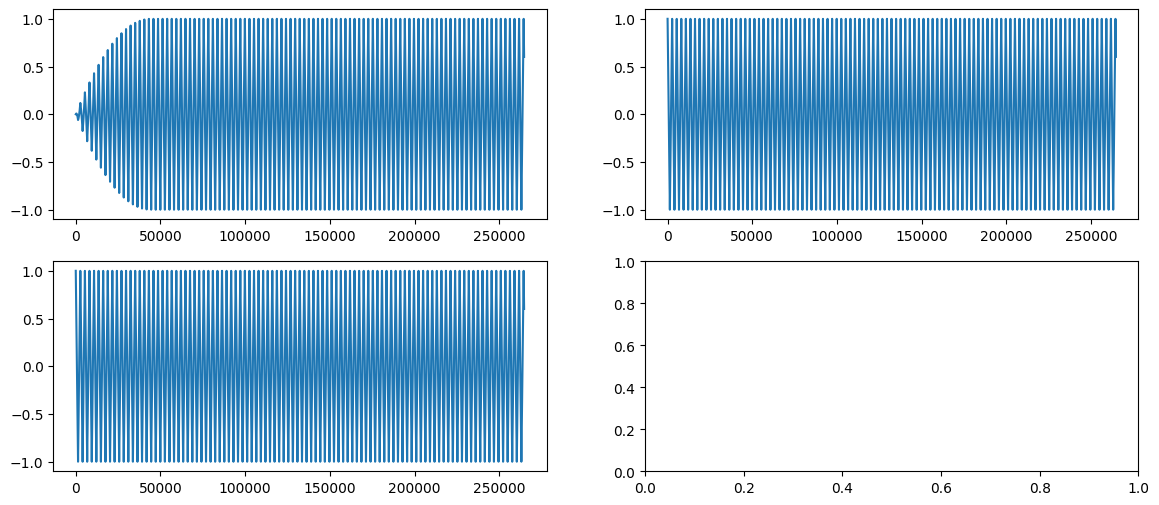

In [70]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 6))

ax1.plot(a_t1)
ax2.plot(d_t1)
ax3.plot(s_t1)
# ax4.plot(r_t1)

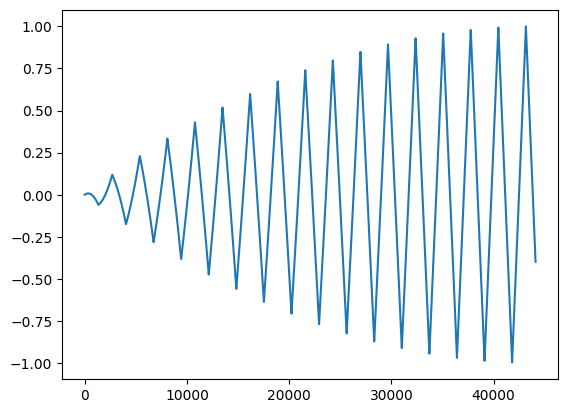

In [11]:
plt.plot(t1)

In [52]:
signals = [t1, t2, t3, t4]

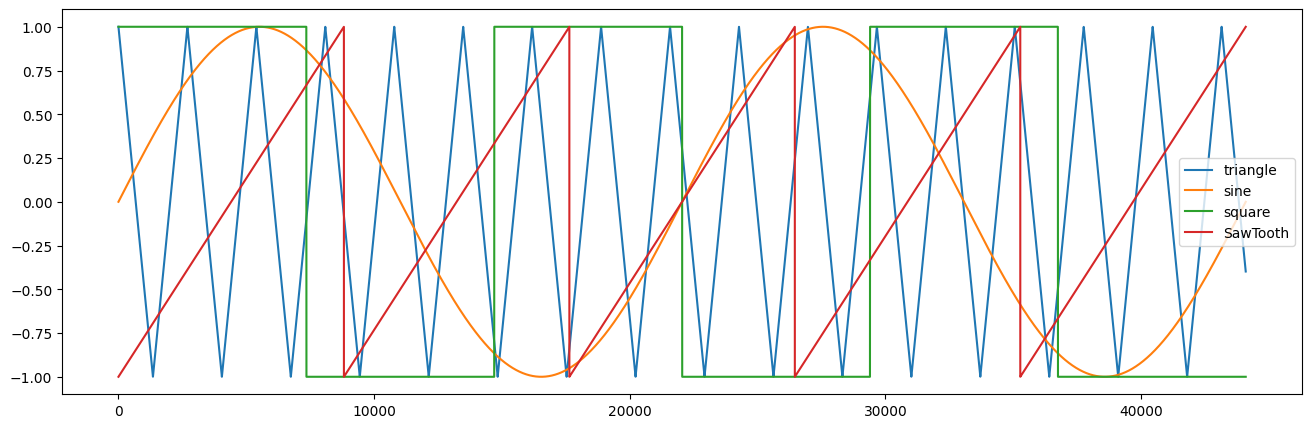

In [53]:
plt.figure(figsize=(16, 5))

plt.plot(t1, label='triangle')
plt.plot(t2, label='sine')
plt.plot(t3, label='square')
plt.plot(t4, label='SawTooth')

plt.legend()

In [54]:
seq = Sequential([
    Sequential([
        SawTooth('C3', duration=.16),
        SawTooth('E3', duration=.16),
        SawTooth('G3', duration=.16),
        SawTooth('B3', duration=.16),
        SawTooth('C4', duration=.16),
        SawTooth('B3', duration=.16),
        SawTooth('G3', duration=.16),
        SawTooth('E3', duration=.16),
    ], repeat=4),
    Sequential([
        SawTooth('E2', duration=.16),
        SawTooth('E3', duration=.16),
        SawTooth('G3', duration=.16),
        SawTooth('B3', duration=.16),
        SawTooth('C4', duration=.16),
        SawTooth('B3', duration=.16),
        SawTooth('G3', duration=.16),
        SawTooth('E3', duration=.16),
    ], repeat=4)
])

In [56]:
synth = Synth()
synth.set_channel(seq, 0)
synth.play(channel=0, blocking=True, loop=True)

KeyboardInterrupt: 

In [ ]:
synth.halt()

In [7]:
synth.play(seq1)